# Error propagation - Cpx-Liquid. 
- This notebook demonstrates how to propagate errors in Cpx-Liquid thermobarometry
- This builds on from the notebook showing how to consider error in a single phase (Liquid_Thermometry_error_prop.ipynb). We suggest you look at that first, as its simpler when you don't have to worry about two separate phases
- We use the experimental data of Feig et al. (2010) - DOI 10.1007/s00410-010-0493-3, and the author-stated 1 sigma  errors
- You can download the excel file here https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Error_propagation/Cpx_Liq_Error_prop_Feig2010_example.xlsx

### You need to install Thermobar once on your machine, if you haven't done this yet, uncomment the line below (remove the #)

In [1]:
#!pip install Thermobar

In [2]:
# Import other python stuff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None
pt.__version__

'1.0.36'

## Importing data

In [3]:
out=pt.import_excel('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
my_input=out['my_input']
myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']


In [4]:
## Check input looks reasonable
display(myCpxs1.head())
display(myLiquids1.head())

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,51.075956,0.325086,4.892502,5.714957,0.165700,16.897042,20.466034,0.319704,0,0.252186,Feig2010_1
1,51.578350,0.356860,3.600200,6.390180,0.171190,16.402000,20.388060,0.332720,0,0.186270,Feig2010_2
2,51.567875,0.256271,4.763807,4.229021,0.000000,16.969344,21.061352,0.316506,0,0.528929,Feig2010_3
3,52.083950,0.325983,3.919567,5.285317,0.168583,16.604683,20.364050,0.318067,0,0.377937,Feig2010_4
4,52.331846,0.406175,3.974610,6.039907,0.173175,16.297102,19.784783,0.388863,0,0.285975,Feig2010_5


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq
0,50.973845,0.489282,19.349173,5.327336,0,4.511373,9.161873,4.205536,0,0,0,5.12,0,0,0,0,Feig2010_1
1,53.642629,0.617371,19.320971,4.884986,0,3.257343,6.824314,5.057043,0,0,0,5.18,0,0,0,0,Feig2010_2
2,49.629083,0.365787,19.103075,5.302860,0,6.403377,11.615943,3.275783,0,0,0,5.05,0,0,0,0,Feig2010_3
3,51.624314,0.443871,18.451100,6.303071,0,6.132229,10.365057,3.685714,0,0,0,2.67,0,0,0,0,Feig2010_4
4,53.980586,0.817471,17.454986,6.744429,0,5.149100,9.030871,4.179543,0,0,0,2.25,0,0,0,0,Feig2010_5


## Example 1: Uncertainty in a single input parameter for Cpx-only and Cpx-Liq barometry
- Here, we consider the effect of adding just 5% noise to measured Na2O contents of Cpx (a fairly typical uncertainty resulting from EPMA analyses)
- Because our liquids and cpx dataframes need to be the same size to feed into the calculate_Cpx_Liq functions, we also use the add_noise_sample_1phase to generate a dataframe of Liq compositions, however, we simply state noise_percent=0 so all the rows for each liquid are identical

In [5]:
# Make liquid dataframe of the right size, no noise added
Liquids_only_noNoise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, 
                        noise_percent=0, duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [6]:
# Make Cpx dataframe, with 5% random noise added to Na2O
Cpx_5Na2O=pt.add_noise_sample_1phase(phase_comp=myCpxs1, variable="Na2O", 
variable_err=5, variable_err_type="Perc", duplicates=1000, err_dist="normal")

Cpx_5Na2O.head()

All negative numbers replaced with zeros. If you wish to keep these, set positive=False


,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx_Num,Sample_ID_Cpx
0,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.303531,0,0.252186,0,Feig2010_1
1,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.325616,0,0.252186,0,Feig2010_1
2,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.307201,0,0.252186,0,Feig2010_1
3,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.303318,0,0.252186,0,Feig2010_1
4,51.075956,0.325086,4.892502,5.714957,0.1657,16.897042,20.466034,0.347571,0,0.252186,0,Feig2010_1


Text(0.5, 0, 'Na2O Cpx #0')

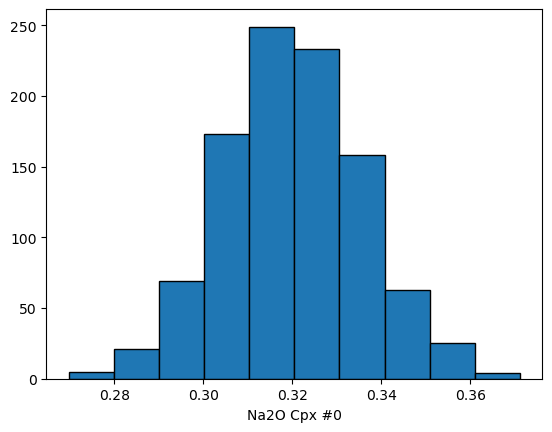

In [7]:
# Plot what the Na content looks like
plt.hist(Cpx_5Na2O['Na2O_Cpx'].loc[Cpx_5Na2O['Sample_ID_Cpx_Num']==0], ec='k')
plt.xlabel('Na2O Cpx #0')

### Lets first calculate Cpx-only pressures for these synthetic noisy Cpxs

In [9]:
Out_5_noise_cpx_only=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_5Na2O, 
                                    equationP="P_Put2008_eq32a", 
                                        equationT="T_Put2008_eq32d", eq_tests=True)
Out_5_noise_cpx_only

,P_kbar_calc,T_K_calc,Delta_P_kbar_Iter,Delta_T_K_Iter,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx_Num,Sample_ID_Cpx
0,7.176726,1503.404962,4.547474e-13,3.865352e-12,51.075956,0.325086,4.892502,5.714957,0.165700,16.897042,20.466034,0.303531,0,0.252186,0,Feig2010_1
1,7.327227,1504.328063,0.000000e+00,0.000000e+00,51.075956,0.325086,4.892502,5.714957,0.165700,16.897042,20.466034,0.325616,0,0.252186,0,Feig2010_1
2,7.201743,1503.558719,0.000000e+00,0.000000e+00,51.075956,0.325086,4.892502,5.714957,0.165700,16.897042,20.466034,0.307201,0,0.252186,0,Feig2010_1
3,7.175275,1503.396041,0.000000e+00,0.000000e+00,51.075956,0.325086,4.892502,5.714957,0.165700,16.897042,20.466034,0.303318,0,0.252186,0,Feig2010_1
4,7.476723,1505.240437,0.000000e+00,0.000000e+00,51.075956,0.325086,4.892502,5.714957,0.165700,16.897042,20.466034,0.347571,0,0.252186,0,Feig2010_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,7.209419,1510.410826,0.000000e+00,0.000000e+00,52.498000,0.299767,3.517867,5.903067,0.178867,17.869733,19.342233,0.325852,0,0.377700,6,Feig2010_7
6996,7.246834,1510.667747,0.000000e+00,0.000000e+00,52.498000,0.299767,3.517867,5.903067,0.178867,17.869733,19.342233,0.331194,0,0.377700,6,Feig2010_7
6997,7.206544,1510.391084,0.000000e+00,0.000000e+00,52.498000,0.299767,3.517867,5.903067,0.178867,17.869733,19.342233,0.325442,0,0.377700,6,Feig2010_7
6998,7.200954,1510.352680,4.547474e-13,3.865352e-12,52.498000,0.299767,3.517867,5.903067,0.178867,17.869733,19.342233,0.324644,0,0.377700,6,Feig2010_7


### Lets plot the distribution of pressures for each Cpx

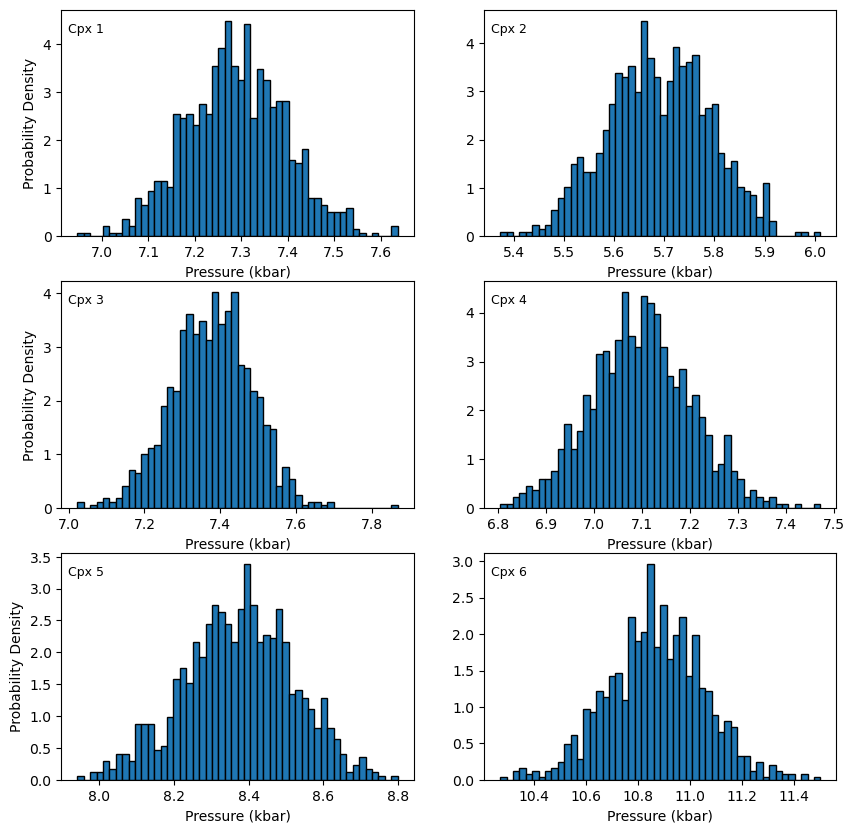

In [10]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx_only.loc[Out_5_noise_cpx_only['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, ec='k', density = True)
ax1.annotate("Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx_only.loc[Out_5_noise_cpx_only['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, ec='k', density = True)
ax2.annotate("Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx_only.loc[Out_5_noise_cpx_only['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, ec='k', density = True)
ax3.annotate("Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx_only.loc[Out_5_noise_cpx_only['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, ec='k', density = True)
ax4.annotate("Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx_only.loc[Out_5_noise_cpx_only['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, ec='k', density = True)
ax5.annotate("Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx_only.loc[Out_5_noise_cpx_only['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, ec='k', density = True)
ax6.annotate("Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Pressure (kbar)')
ax4.set_xlabel('Pressure (kbar)')
ax3.set_xlabel('Pressure (kbar)')
ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 300

### We can also calculate statistics...
- The first input is the thing you want to average (e.g. the calculated temperature in this instance), the second input is the thing you want to do the averaging based on (e.g. here average all rows with the same value of "Sample_ID_Liq_Num"

In [11]:
Stats_T_K_cpx_only_5=pt.av_noise_samples_series(calc=Out_5_noise_cpx_only['T_K_calc'],
                                     sampleID=Out_5_noise_cpx_only['Sample_ID_Cpx_Num'])
Stats_T_K_cpx_only_5

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,St_dev_calc_from_percentiles,Max_calc,Min_calc
0,0,1000,1504.093704,1504.073654,0.648176,0.650417,1506.211484,1501.987065
1,1,1000,1482.816405,1482.801972,0.595222,0.600649,1484.691218,1480.953340
2,2,1000,1513.505202,1513.523069,0.602874,0.591517,1516.268401,1511.471754
3,3,1000,1505.911662,1505.918238,0.646588,0.649105,1508.216718,1504.083090
4,4,1000,1512.124246,1512.155947,0.955719,0.949070,1514.891601,1509.283521
5,5,1000,1542.923627,1542.907009,1.218478,1.186279,1547.032719,1538.977276
6,6,1000,1510.294284,1510.280719,0.751531,0.745849,1513.131975,1507.904170


In [12]:
Stats_P_kbar_cpx_only_5=pt.av_noise_samples_series(calc=Out_5_noise_cpx_only['P_kbar_calc'],
                                     sampleID=Out_5_noise_cpx_only['Sample_ID_Cpx_Num'])
Stats_P_kbar_cpx_only_5

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,St_dev_calc_from_percentiles,Max_calc,Min_calc
0,0,1000,7.289132,7.285674,0.105820,0.106164,7.636680,6.946966
1,1,1000,5.689267,5.686578,0.101599,0.102537,6.011380,5.373169
2,2,1000,7.377341,7.380197,0.105958,0.103965,7.869050,7.022777
3,3,1000,7.098185,7.099074,0.104300,0.104689,7.472012,6.804438
4,4,1000,8.374216,8.378836,0.145922,0.144928,8.798488,7.942115
5,5,1000,10.869906,10.867006,0.186282,0.181347,11.501994,10.269874
6,6,1000,7.192545,7.190479,0.109396,0.108558,7.606801,6.845474


### Lets do the same but for Cpx-Liq now. Remember, only Cpx has noise added
- here, T=equation 33 from Putirka 2008, P=Equation 31 from Putirka 2008

In [13]:
Out_5_noise_cpx_liq=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_only_noNoise, cpx_comps=Cpx_5Na2O, 
                                    equationP="P_Put2008_eq31", equationT="T_Put2008_eq33", eq_tests=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


### Each histogram shows the pressure distribution from a single Cpx-Liquid pair resulting from adding 5% error to just Na in Cpx. 
- Here we use the loc function to find all the rows where Cpx_Num==0, e.g. this is the first liquid in your excel spreadsheet.
- If you wanted the 6th liquid instead, change ==0 to ==5 (as python starts its numbering from 0)

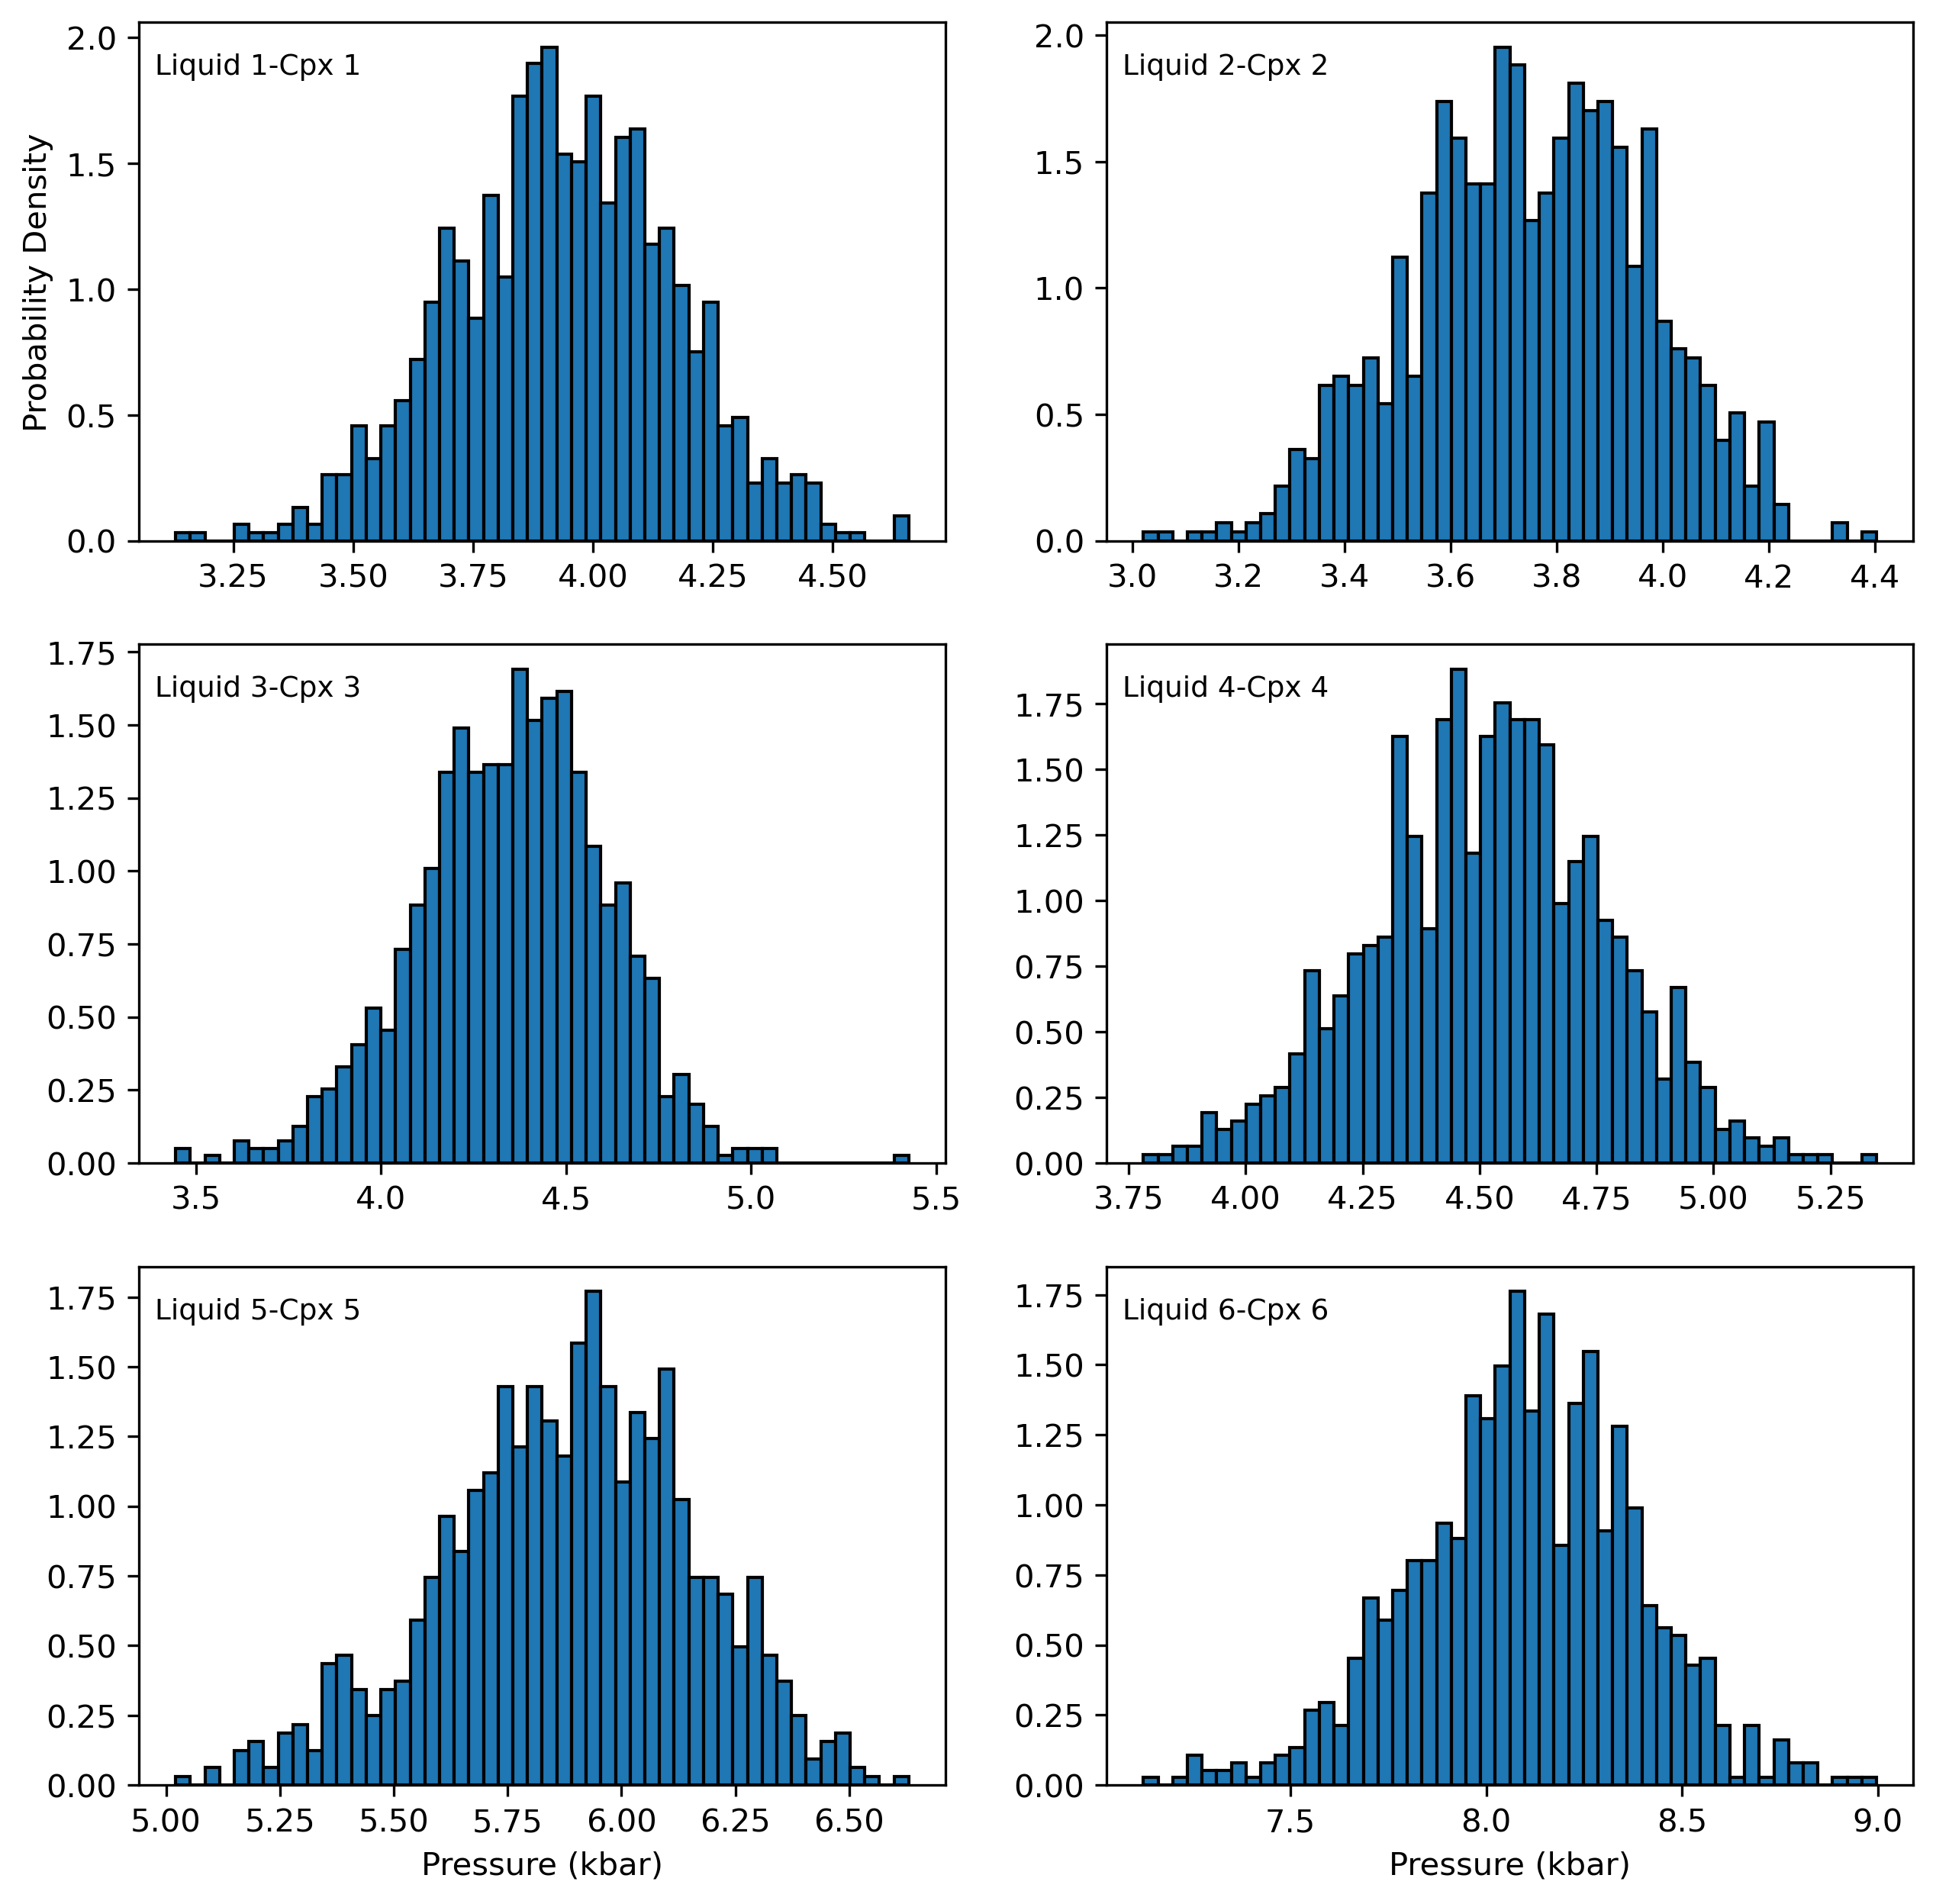

In [14]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_5_noise_cpx_liq.loc[Out_5_noise_cpx_liq['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, ec='k', density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_5_noise_cpx_liq.loc[Out_5_noise_cpx_liq['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, ec='k', density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax3.hist(Out_5_noise_cpx_liq.loc[Out_5_noise_cpx_liq['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, ec='k', density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax4.hist(Out_5_noise_cpx_liq.loc[Out_5_noise_cpx_liq['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, ec='k', density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax5.hist(Out_5_noise_cpx_liq.loc[Out_5_noise_cpx_liq['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, ec='k', density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)
ax6.hist(Out_5_noise_cpx_liq.loc[Out_5_noise_cpx_liq['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, ec='k', density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
plt.rcParams['figure.dpi']= 300

### Calculate Statistics


In [15]:
Stats_T_K_Cpx_Liq_5Na=pt.av_noise_samples_series(calc=Out_5_noise_cpx_liq['T_K_calc'],
                                     sampleID=Out_5_noise_cpx_liq['Sample_ID_Liq_Num'])
Stats_T_K_Cpx_Liq_5Na


,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,St_dev_calc_from_percentiles,Max_calc,Min_calc
0,0,1000,1344.982511,1344.958241,2.301838,2.310553,1352.085607,1337.008279
1,1,1000,1300.471799,1300.463114,2.083761,2.096915,1306.682126,1293.558853
2,2,1000,1384.044844,1384.169824,2.557811,2.502963,1394.872090,1374.869885
3,3,1000,1397.655967,1397.732071,2.532384,2.542268,1406.150489,1390.108260
4,4,1000,1402.163076,1402.318650,2.799021,2.767411,1409.808446,1393.333109
5,5,1000,1472.955481,1472.976203,3.010838,2.925995,1482.505951,1462.579731
6,6,1000,1481.018692,1481.026769,3.055057,3.033336,1491.803278,1470.660817


In [16]:
Stats_P_kbar_Cpx_Liq_5Na=pt.av_noise_samples_series(calc=Out_5_noise_cpx_liq['P_kbar_calc'],
                                     sampleID=Out_5_noise_cpx_liq['Sample_ID_Liq_Num'])
Stats_P_kbar_Cpx_Liq_5Na

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,St_dev_calc_from_percentiles,Max_calc,Min_calc
0,0,1000,3.938405,3.935952,0.233353,0.234232,4.658471,3.129855
1,1,1000,3.748771,3.747827,0.219479,0.220866,4.403187,3.020858
2,2,1000,4.353823,4.366204,0.253318,0.247879,5.426241,3.445041
3,3,1000,4.518883,4.526332,0.247352,0.248313,5.348489,3.781491
4,4,1000,5.883760,5.898955,0.273494,0.270400,6.630888,5.020960
5,5,1000,8.099023,8.100936,0.282918,0.274941,8.996880,7.124293
6,6,1000,6.239598,6.240434,0.278082,0.276099,7.220138,5.295689


## Example 2 - published absolute 1 sigma values for all oxides
- Here, we use the published 1 sigma values for each oxide in both the glass and cpx reported by Feig et al. 2010
- We make a noisy dataframe of the same length for liquids and cpxs, then combine them into the function for iterating P and T

### First, load in the published 1 sigma values

In [17]:
out_err=pt.import_excel_errors('Cpx_Liq_Error_prop_Feig2010_example.xlsx', sheet_name="Sheet1")
myLiquids1_err=out_err['Liqs_Err']
myCpxs1_err=out_err['Cpxs_Err']
myinput_Out=out_err['my_input_Err']

## Check input looks reasonable
display(myCpxs1_err.head())
display(myLiquids1_err.head())


,SiO2_Cpx_Err,TiO2_Cpx_Err,Al2O3_Cpx_Err,FeOt_Cpx_Err,MnO_Cpx_Err,MgO_Cpx_Err,CaO_Cpx_Err,Na2O_Cpx_Err,K2O_Cpx_Err,Cr2O3_Cpx_Err,P_kbar_Err,T_K_Err,Sample_ID_Cpx_Err
0,0.400044,0.032172,0.510460,0.357680,0.023249,0.538039,0.645164,0.049138,0,0.034646,0,0,0
1,0.628064,0.067227,0.622601,0.657476,0.050037,0.732816,1.050758,0.060948,0,0.062095,0,0,1
2,0.585596,0.032846,0.918768,0.506392,0.000000,0.562266,0.794310,0.107095,0,0.210114,0,0,2
3,0.165277,0.032709,0.240924,0.207266,0.051434,0.182666,0.355487,0.048979,0,0.058814,0,0,3
4,0.106509,0.040535,0.479962,0.428886,0.026673,0.431550,0.486264,0.056668,0,0.051372,0,0,4


,SiO2_Liq_Err,TiO2_Liq_Err,Al2O3_Liq_Err,FeOt_Liq_Err,MnO_Liq_Err,MgO_Liq_Err,CaO_Liq_Err,Na2O_Liq_Err,K2O_Liq_Err,Cr2O3_Liq_Err,P2O5_Liq_Err,H2O_Liq_Err,Fe3Fet_Liq_Err,NiO_Liq_Err,CoO_Liq_Err,CO2_Liq_Err,Sample_ID_Liq_Err,P_kbar_Err,T_K_Err
0,0.326030,0.042448,0.221884,0.432684,0,0.207011,0.268045,0.213647,0,0,0,0.2560,0,0,0,0,0,0,0
1,0.328698,0.025182,0.242675,0.214755,0,0.163292,0.171717,0.085388,0,0,0,0.2590,0,0,0,0,1,0,0
2,0.476011,0.027083,0.235814,0.301696,0,0.174436,0.206030,0.229583,0,0,0,0.2525,0,0,0,0,2,0,0
3,0.442894,0.047517,0.234808,0.219780,0,0.171799,0.274484,0.259757,0,0,0,0.1335,0,0,0,0,3,0,0
4,0.445356,0.043963,0.316155,0.389311,0,0.134659,0.209045,0.453723,0,0,0,0.1125,0,0,0,0,4,0,0


In [18]:
# Make noise based on reported absolute 1 sigma errors from Feig et al (2010) for liquids
Liquids_st_noise=pt.add_noise_sample_1phase(phase_comp=myLiquids1, phase_err=myLiquids1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")

# Make noise based on reported absolute 1 sigma errors from Feig et al (2010) for Cpx
Cpxs_st_noise=pt.add_noise_sample_1phase(phase_comp=myCpxs1, phase_err=myCpxs1_err,
                                             phase_err_type="Abs", duplicates=1000, err_dist="normal")


All negative numbers replaced with zeros. If you wish to keep these, set positive=False
All negative numbers replaced with zeros. If you wish to keep these, set positive=False


In [19]:
Out_st_noise=pt.calculate_cpx_liq_press_temp(liq_comps=Liquids_st_noise, cpx_comps=Cpxs_st_noise, 
                                    equationP="P_Put2008_eq31", 
                                    equationT="T_Put2008_eq33", eq_tests=True)
Out_st_noise['Sample_ID_Liq']=Liquids_st_noise['Sample_ID_Liq']

Using Fe3FeT from input file to calculate Kd Fe-Mg


In [20]:
Stats_T_K_CpxLiqPubErr=pt.av_noise_samples_series(Out_st_noise['T_K_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_T_K_CpxLiqPubErr

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,St_dev_calc_from_percentiles,Max_calc,Min_calc
0,0.0,1000,1344.778009,1344.735392,11.156826,10.840918,1375.682470,1302.872509
1,1.0,1000,1298.258746,1299.281954,14.254824,NaN,1330.315266,1175.080944
2,2.0,1000,1381.502327,1383.813019,22.308766,19.837978,1435.279079,1264.203025
3,3.0,1000,1397.162764,1397.509669,10.235910,10.054889,1426.196935,1355.266807
4,4.0,1000,1402.318585,1402.558428,11.082536,10.794108,1437.824694,1360.557106
5,5.0,1000,1472.681192,1472.671170,6.863751,6.509604,1493.673102,1452.546075
6,6.0,1000,1480.309567,1480.395505,9.144380,8.975709,1516.852760,1452.699821


In [21]:
Stats_P_kbar_CpxLiqPubErr=pt.av_noise_samples_series(Out_st_noise['P_kbar_calc'], Liquids_st_noise['Sample_ID_Liq_Num'])
Stats_P_kbar_CpxLiqPubErr

,Sample,# averaged,Mean_calc,Median_calc,St_dev_calc,St_dev_calc_from_percentiles,Max_calc,Min_calc
0,0.0,1000,3.905501,3.934258,0.803513,0.784033,6.176492,1.083341
1,1.0,1000,3.604391,3.759577,1.267754,NaN,5.990290,-10.913168
2,2.0,1000,4.130971,4.401500,2.075102,1.791349,8.134930,-7.126329
3,3.0,1000,4.471886,4.488412,0.856214,0.816977,6.709085,0.742520
4,4.0,1000,5.882646,5.916289,0.914733,0.852087,8.154560,2.183166
5,5.0,1000,8.087495,8.087377,0.492009,0.474018,9.712500,6.424784
6,6.0,1000,6.193959,6.206869,0.486849,0.456279,7.561456,4.587588


### Recreate plot shown in manuscript for just 2 cpx-liq pairs from experiments
- Here, on the LHS we plot cpx-liq pairs from the first row of the spreadsheet (ID=0)
- On the RHS, we plot the pairs from row 4 (ID=3)

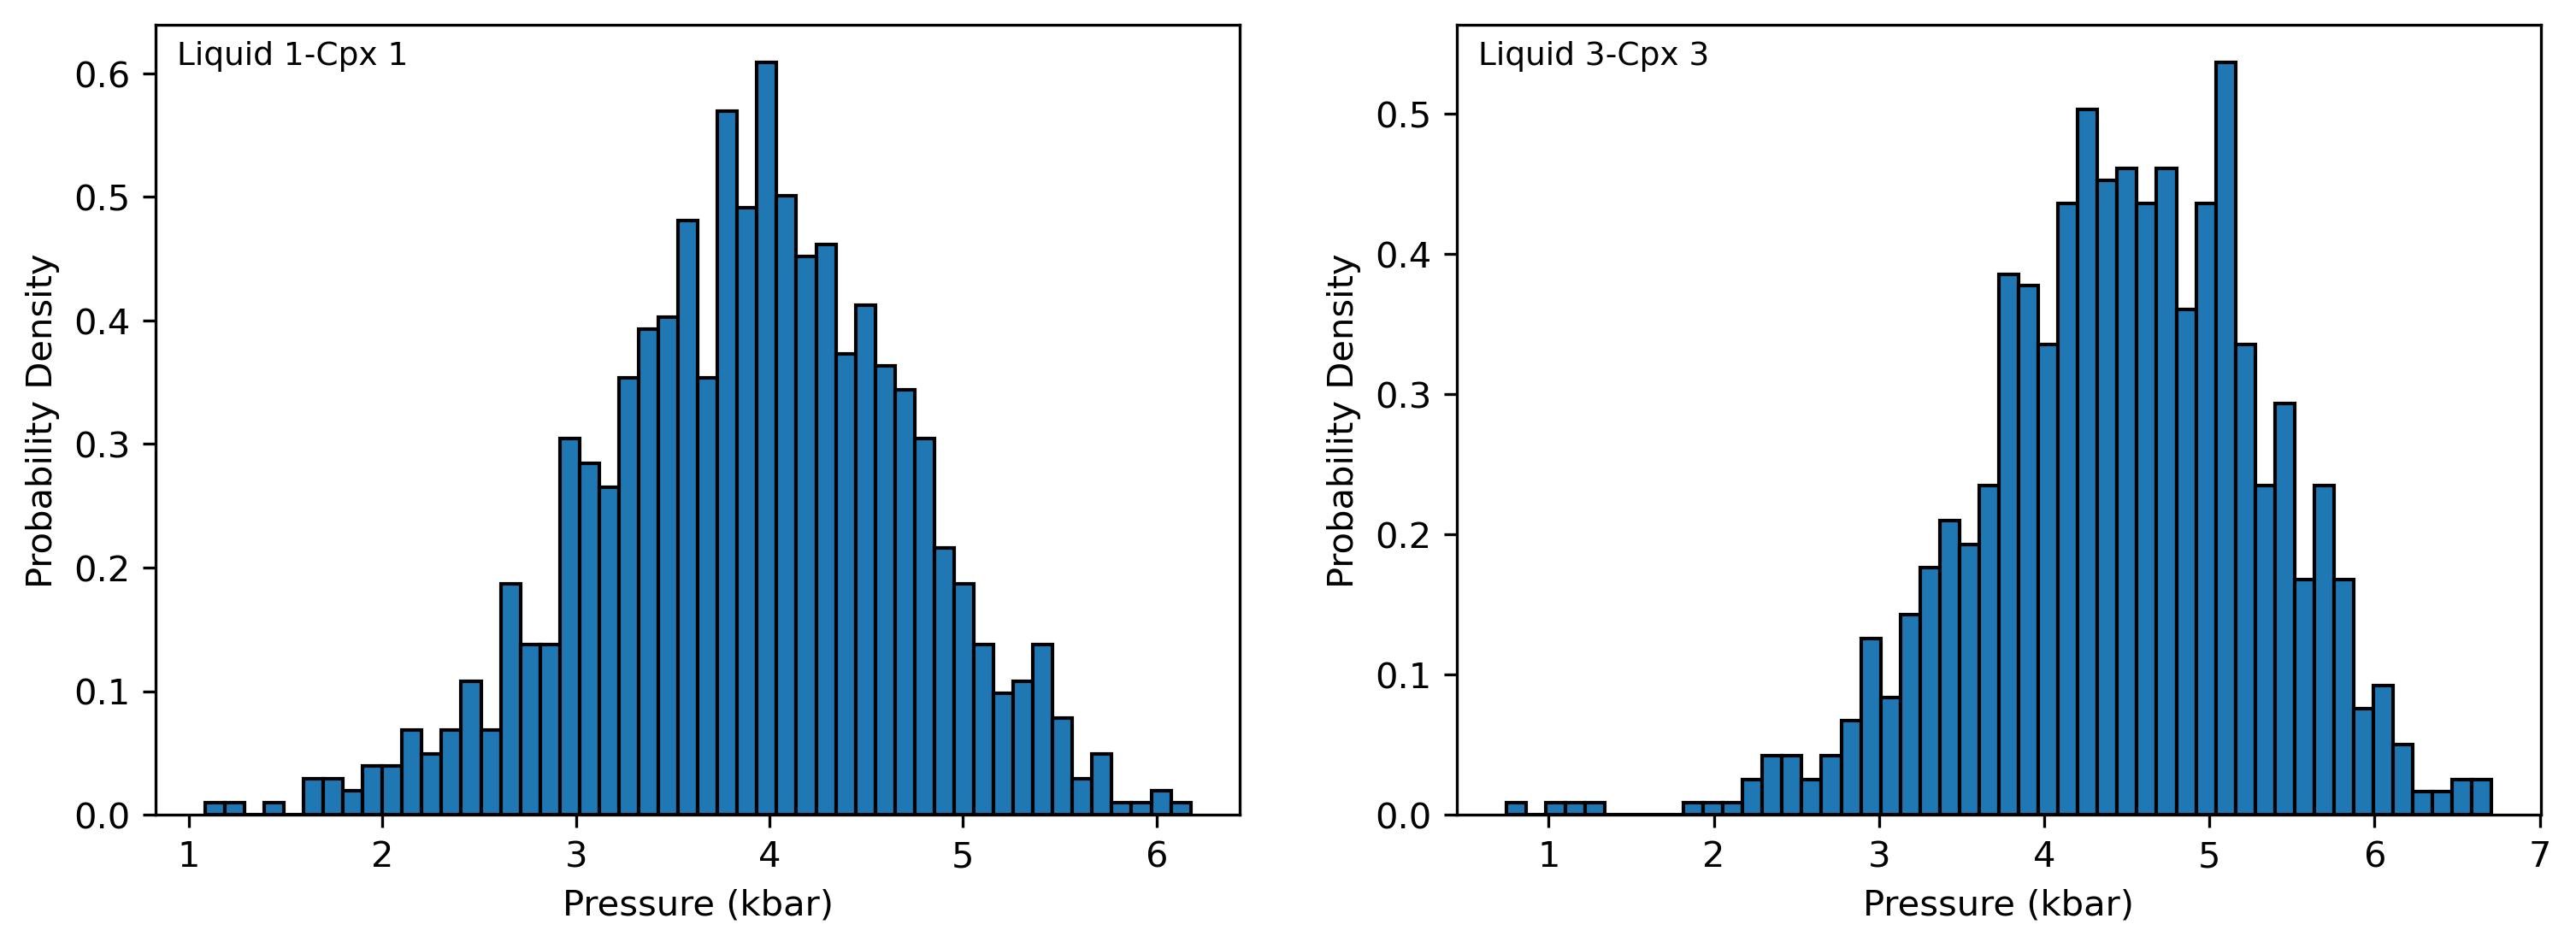

In [22]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==0, "P_kbar_calc"], bins=50, ec='k', density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=9)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Liq_Num']==3, "P_kbar_calc"], bins=50, ec='k', density = True)
ax2.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.95), xycoords="axes fraction", fontsize=9)

#ax2.set_xlim([0, 6])
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax2.set_ylabel('Probability Density')
fig.savefig('Manuscript_2CpxNoises.png', dpi=300, transparent=True)

### Plot for 6 separate cpx-liq pairs
- can average by _Cpx or _Liq, doesnt matter, as will match

Text(0, 0.5, 'Probability Density')

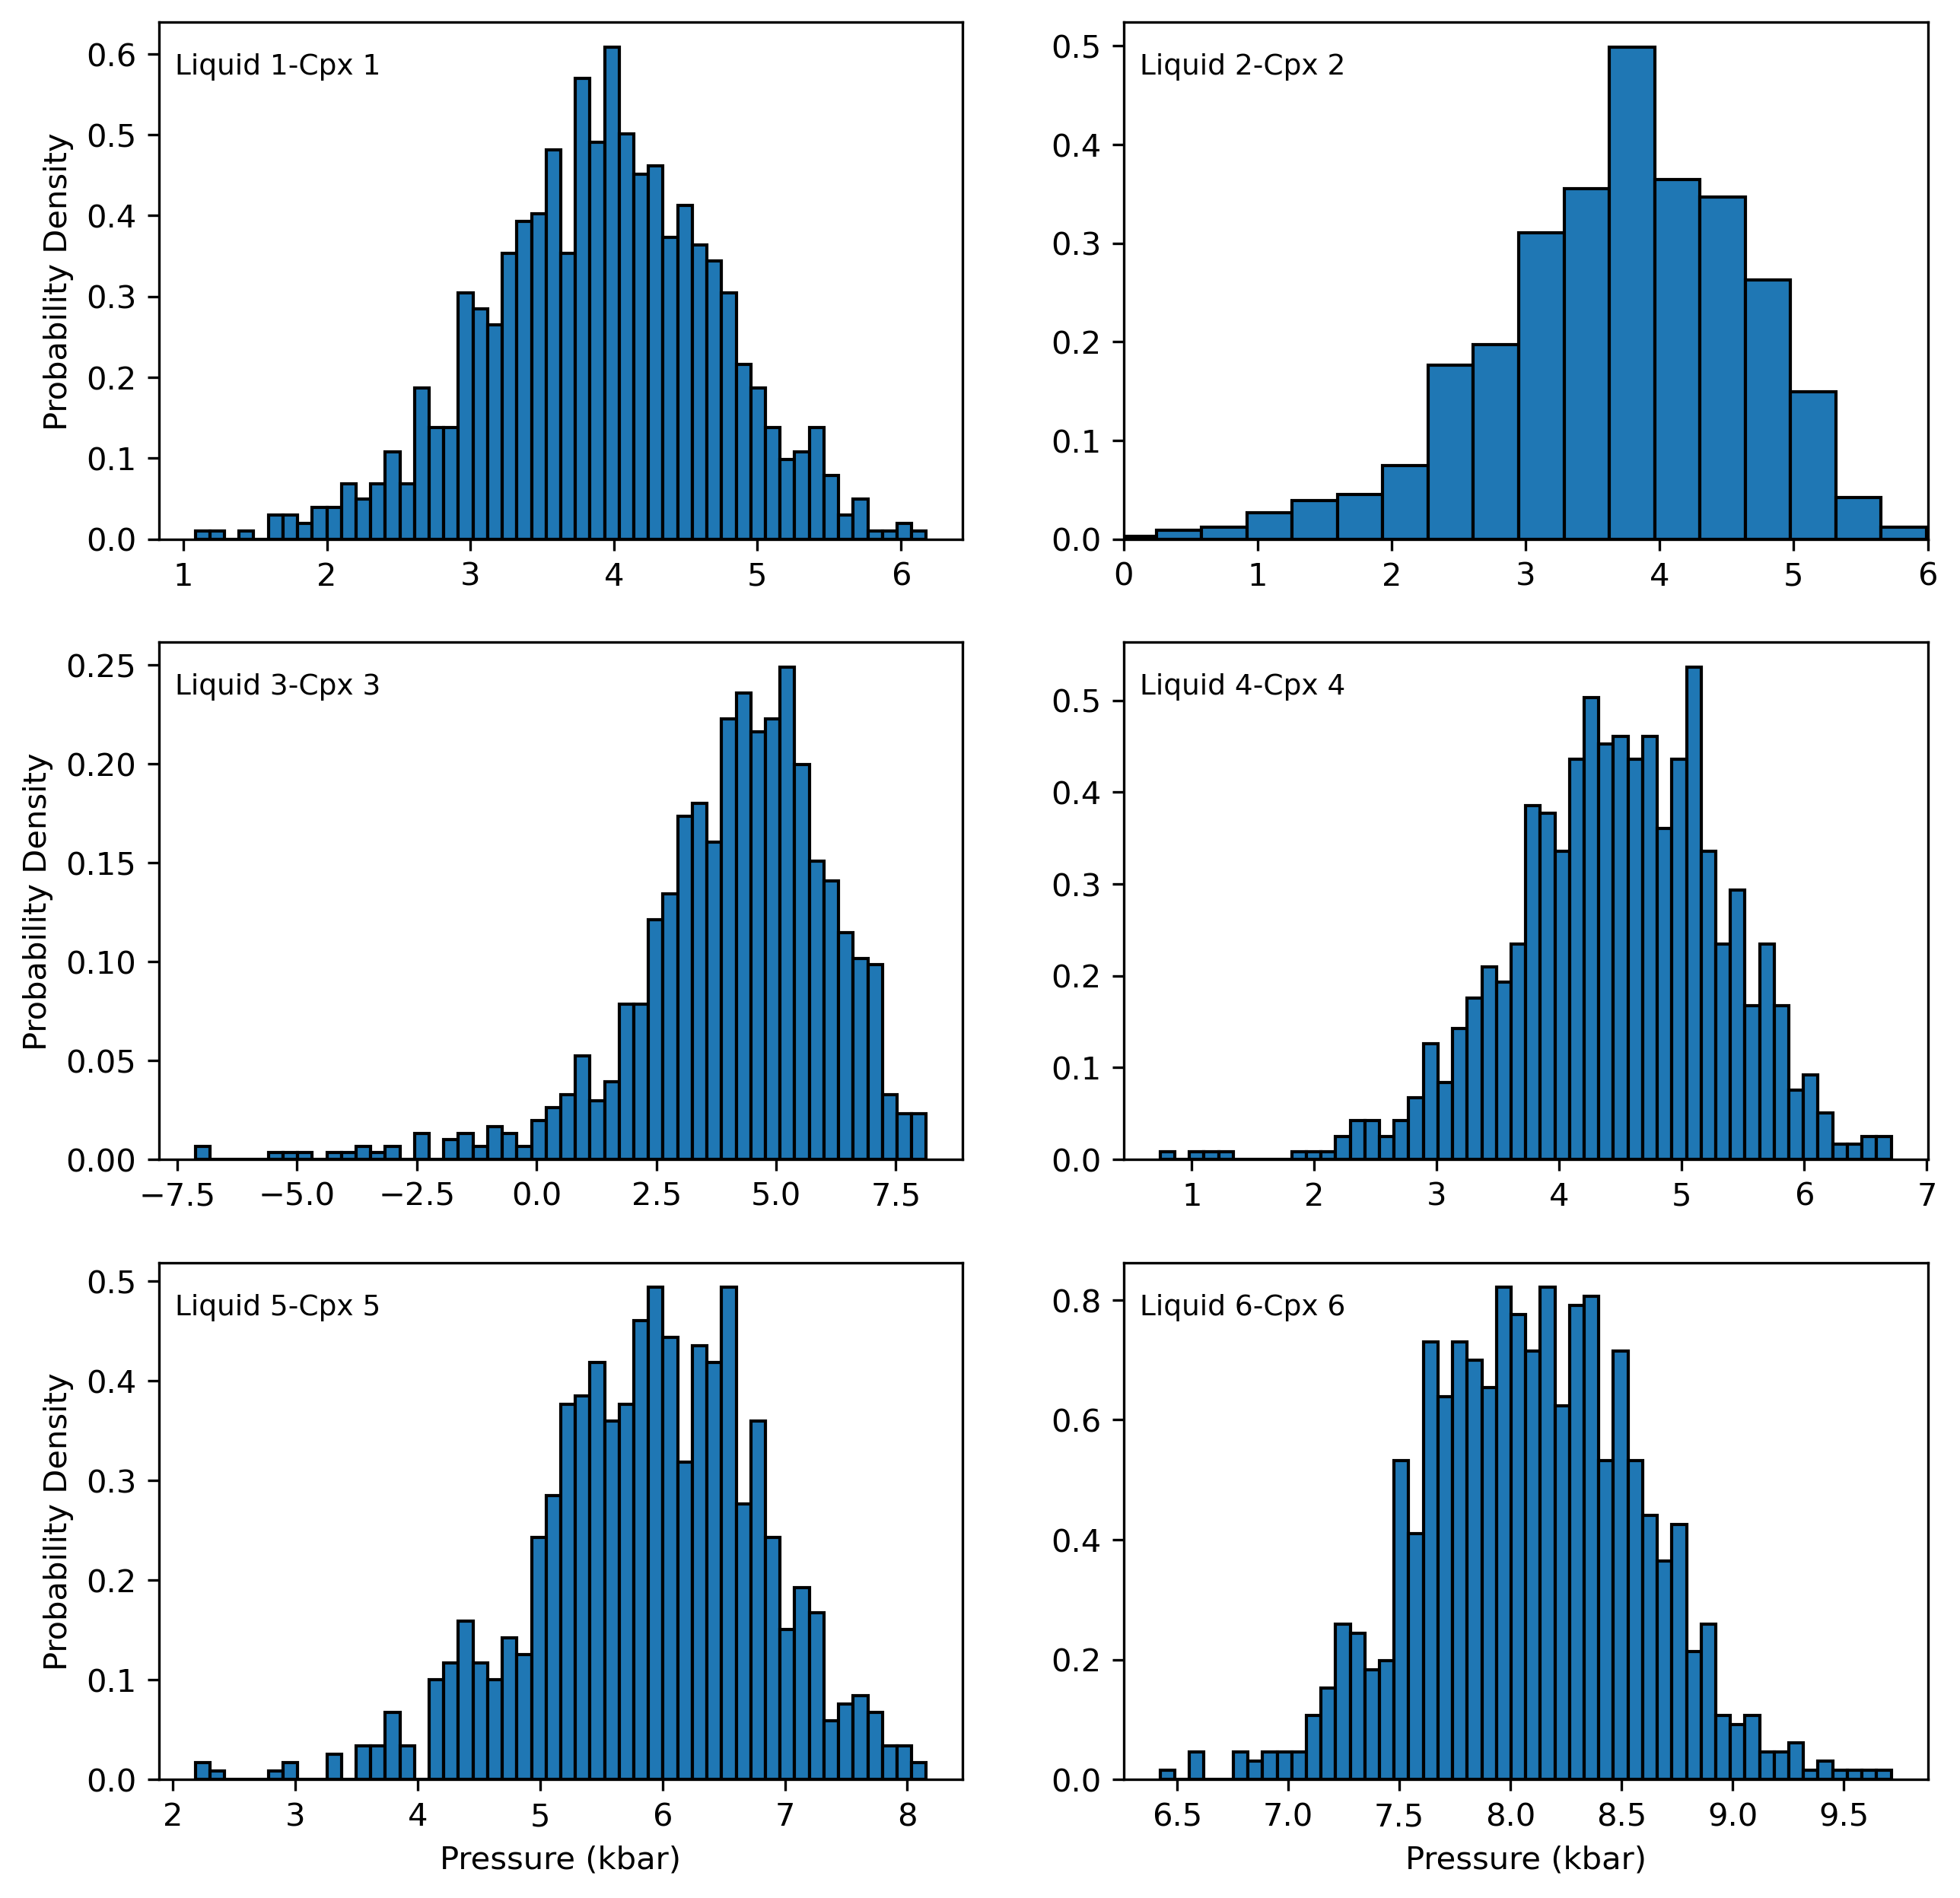

In [23]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "P_kbar_calc"], bins=50, ec='k', density = True)
ax1.annotate("Liquid 1-Cpx 1", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)


ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "P_kbar_calc"], bins=50, ec='k', density = True)
ax2.annotate("Liquid 2-Cpx 2", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "P_kbar_calc"], bins=50, ec='k', density = True)
ax3.annotate("Liquid 3-Cpx 3", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "P_kbar_calc"], bins=50, ec='k', density = True)
ax4.annotate("Liquid 4-Cpx 4", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "P_kbar_calc"], bins=50, ec='k', density = True)
ax5.annotate("Liquid 5-Cpx 5", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "P_kbar_calc"], bins=50, ec='k', density = True)
ax6.annotate("Liquid 6-Cpx 6", xy=(0.02, 0.9), xycoords="axes fraction", fontsize=9)

ax2.set_xlim([0, 6])
ax6.set_xlabel('Pressure (kbar)')
ax5.set_xlabel('Pressure (kbar)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

### Temperature distributions for first 6 pairs

Text(0, 0.5, 'Probability Density')

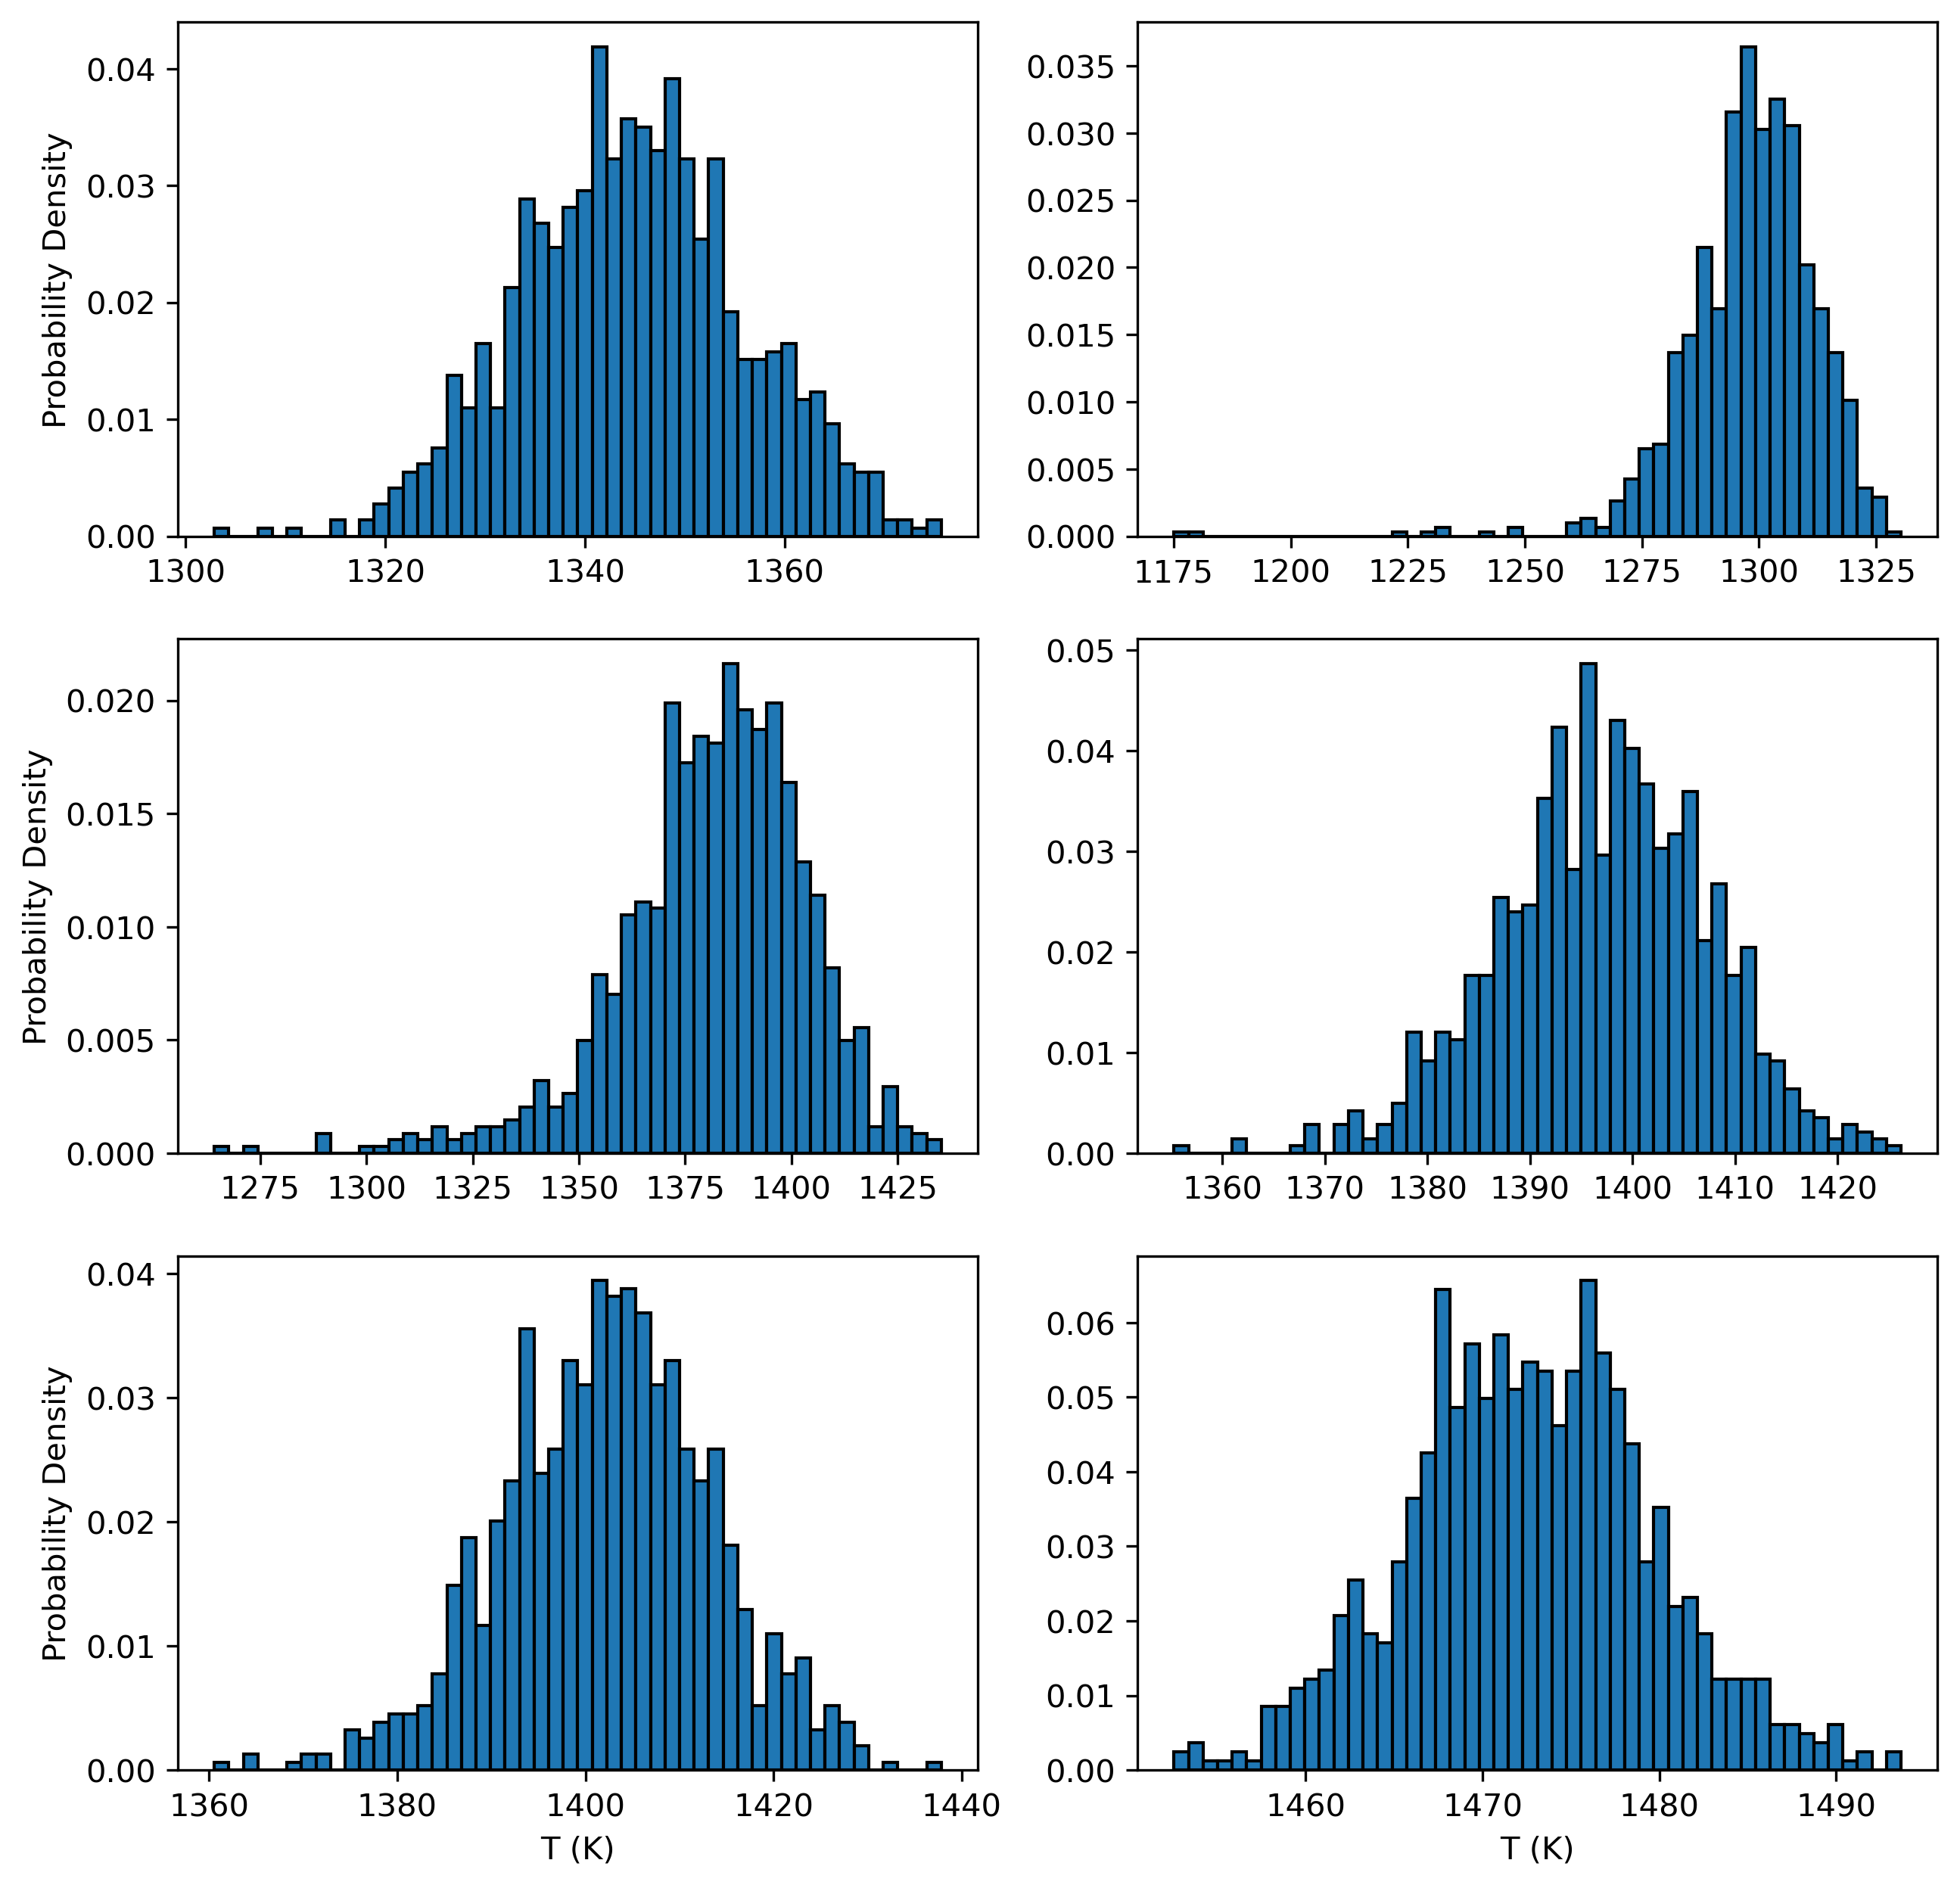

In [24]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))

ax1.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==0, "T_K_calc"], bins=50, ec='k', density = True)
ax2.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==1, "T_K_calc"], bins=50, ec='k', density = True)
ax3.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==2, "T_K_calc"], bins=50, ec='k', density = True)
ax4.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==3, "T_K_calc"], bins=50, ec='k', density = True)
ax5.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==4, "T_K_calc"], bins=50, ec='k', density = True)
ax6.hist(Out_st_noise.loc[Out_st_noise['Sample_ID_Cpx_Num']==5, "T_K_calc"], bins=50, ec='k', density = True)
ax6.set_xlabel('T (K)')
ax5.set_xlabel('T (K)')
ax1.set_ylabel('Probability Density')
ax3.set_ylabel('Probability Density')
ax5.set_ylabel('Probability Density')

## Plots with conventional errorbars for each Cpx-Liq pair
- Note, although this is typically how thermobarometric data is displayed, it isnt very realistic, our error propagation shows that error ellipses would be better - see the example below

Text(0.5, 0, 'Calculated T (K)')

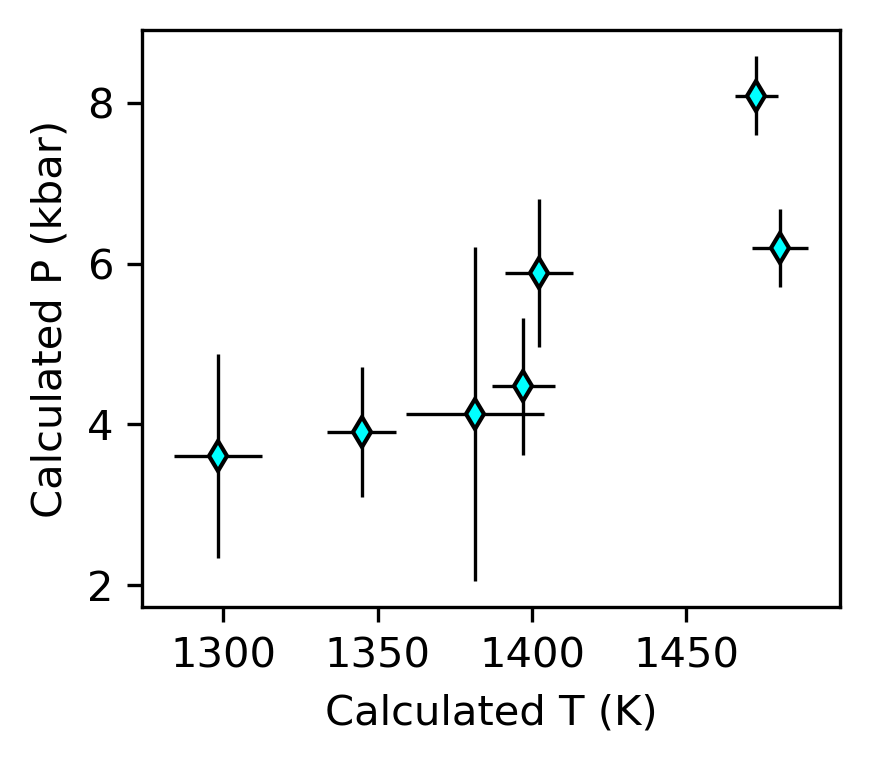

In [25]:
fig, (ax1) = plt.subplots(1, 1, figsize=(3, 2.5))

ax1.errorbar(Stats_T_K_CpxLiqPubErr['Mean_calc'], 
             Stats_P_kbar_CpxLiqPubErr['Mean_calc'], 
             xerr=Stats_T_K_CpxLiqPubErr['St_dev_calc'], 
             yerr=Stats_P_kbar_CpxLiqPubErr['St_dev_calc'],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=5, mec='k')
ax1.set_ylabel('Calculated P (kbar)')
ax1.set_xlabel('Calculated T (K)')



## Error ellipses instead

In [26]:
Out_st_noise.columns[0:100]

Index(['P_kbar_calc', 'T_K_calc', 'Eq Tests Neave2017?', 'Delta_P_kbar_Iter',
       'Delta_T_K_Iter', 'Delta_Kd_Put2008', 'Delta_Kd_Mas2013',
       'Delta_EnFs_Mollo13', 'Delta_EnFs_Put1999', 'Delta_CaTs_Put1999',
       'Delta_DiHd_Mollo13', 'Delta_DiHd_Put1999', 'Delta_CrCaTs_Put1999',
       'Delta_CaTi_Put1999', 'SiO2_Liq', 'TiO2_Liq', 'Al2O3_Liq', 'FeOt_Liq',
       'MnO_Liq', 'MgO_Liq', 'CaO_Liq', 'Na2O_Liq', 'K2O_Liq', 'Cr2O3_Liq',
       'P2O5_Liq', 'H2O_Liq', 'Fe3Fet_Liq', 'NiO_Liq', 'CoO_Liq', 'CO2_Liq',
       'Sample_ID_Liq_Num', 'SiO2_Liq_mol_frac', 'MgO_Liq_mol_frac',
       'MnO_Liq_mol_frac', 'FeOt_Liq_mol_frac', 'CaO_Liq_mol_frac',
       'Al2O3_Liq_mol_frac', 'Na2O_Liq_mol_frac', 'K2O_Liq_mol_frac',
       'TiO2_Liq_mol_frac', 'P2O5_Liq_mol_frac', 'Cr2O3_Liq_mol_frac',
       'Si_Liq_cat_frac', 'Mg_Liq_cat_frac', 'Mn_Liq_cat_frac',
       'Fet_Liq_cat_frac', 'Ca_Liq_cat_frac', 'Al_Liq_cat_frac',
       'Na_Liq_cat_frac', 'K_Liq_cat_frac', 'Ti_Liq_cat_frac',
       '

In [27]:
Out_st_noise['Sample_ID_Liq'].unique()[0]

'Feig2010_1'

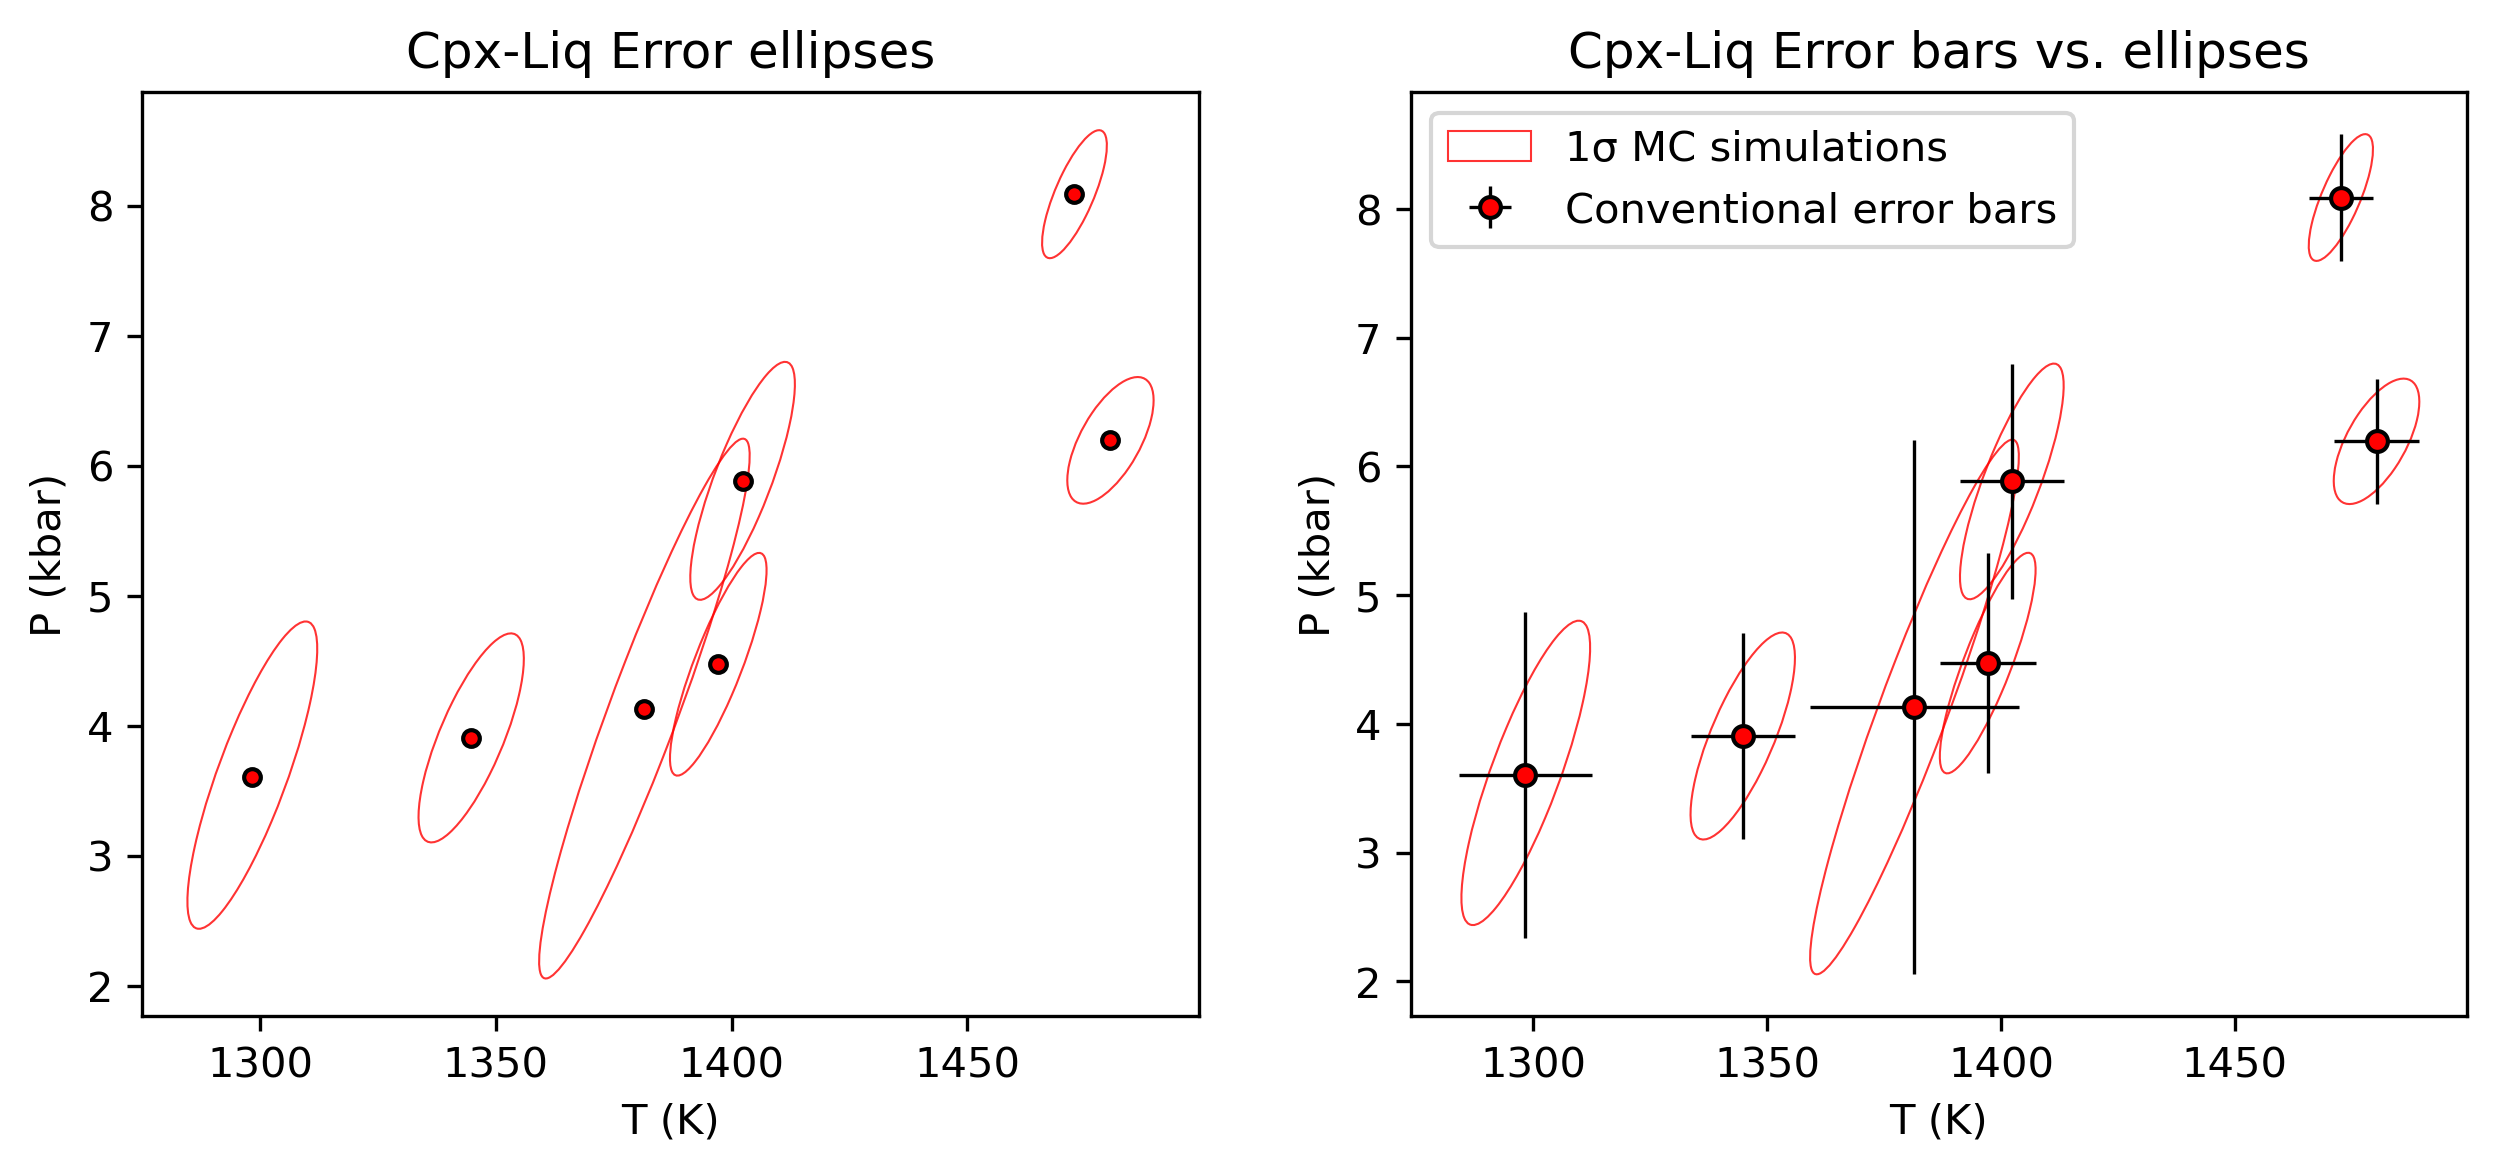

In [28]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))

# you have to plot something on the axis before you try to add the confidence intervals

ax0.plot(Stats_T_K_CpxLiqPubErr['Mean_calc'], 
             Stats_P_kbar_CpxLiqPubErr['Mean_calc'], 'ok', mfc='red', ms=4)


for sam in Out_st_noise['Sample_ID_Liq'].unique():
    Calc_PT_16=Out_st_noise.loc[Out_st_noise['Sample_ID_Liq']==sam].reset_index(drop=True)

    y=Calc_PT_16['P_kbar_calc'].loc[Calc_PT_16['P_kbar_calc']>-10].values
    x=Calc_PT_16['T_K_calc'].loc[Calc_PT_16['P_kbar_calc']>-10].values
    pt.matplotlib_confidence_ellipse(x, y, ax0, n_std=1,
                    edgecolor='r', lw=0.5, alpha=0.8)
    
    

ax0.set_xlabel('T (K)')
ax0.set_ylabel('P (kbar)')

ax1.plot(Stats_T_K_CpxLiqPubErr['Mean_calc'], 
             Stats_P_kbar_CpxLiqPubErr['Mean_calc'], 'ok', mfc='red', ms=4)


for sam in Out_st_noise['Sample_ID_Liq'].unique():
    
    Calc_PT_16=Out_st_noise.loc[Out_st_noise['Sample_ID_Liq']==sam].reset_index(drop=True)

    y=Calc_PT_16['P_kbar_calc'].loc[Calc_PT_16['P_kbar_calc']>-10].values
    x=Calc_PT_16['T_K_calc'].loc[Calc_PT_16['P_kbar_calc']>-10].values
    if sam==Out_st_noise['Sample_ID_Liq'].unique()[0]:
        pt.matplotlib_confidence_ellipse(x, y, ax1, n_std=1,
                    edgecolor='red', lw=0.5, alpha=0.8, label='1σ MC simulations')
    else:
        pt.matplotlib_confidence_ellipse(x, y, ax1, n_std=1,
                    edgecolor='red', lw=0.5, alpha=0.8)


        
    
    

ax1.set_xlabel('T (K)')
ax1.set_ylabel('P (kbar)')
ax1.errorbar(Stats_T_K_CpxLiqPubErr['Mean_calc'], 
             Stats_P_kbar_CpxLiqPubErr['Mean_calc'], 
             xerr=Stats_T_K_CpxLiqPubErr['St_dev_calc'], 
             yerr=Stats_P_kbar_CpxLiqPubErr['St_dev_calc'],
             fmt='o', ecolor='k', elinewidth=0.8, mfc='red', ms=5, mec='k', label='Conventional error bars')
ax1.legend()
ax0.set_title('Cpx-Liq Error ellipses')
ax1.set_title('Cpx-Liq Error bars vs. ellipses')

fig.savefig('confidence_intervals_vs_errorbars.png', dpi=200)